<a href="https://colab.research.google.com/github/Pankhuri33/LoanPredictionModel/blob/main/TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/gold_monthly_csv.csv")
df.head()


,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [3]:
df.shape

(847, 2)

Exploratory Data Analysis


In [4]:
print(f"Data ranges available from - {df.loc[:, 'Date'][0]} to {df.loc[:, 'Date'][len(df)-1]}")


Data ranges available from - 1950-01 to 2020-07


In [5]:
date = pd.date_range (start = '1/1/1950', end = '1/1/2020', freq = 'M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30',
               '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31',
               '2019-11-30', '2019-12-31'],
              dtype='datetime64[ns]', length=840, freq='ME')

In [6]:
df = df.iloc[:len(date)]
df['month'] = date
df.drop('Date', axis = 1, inplace = True)
df = df.set_index('month')
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


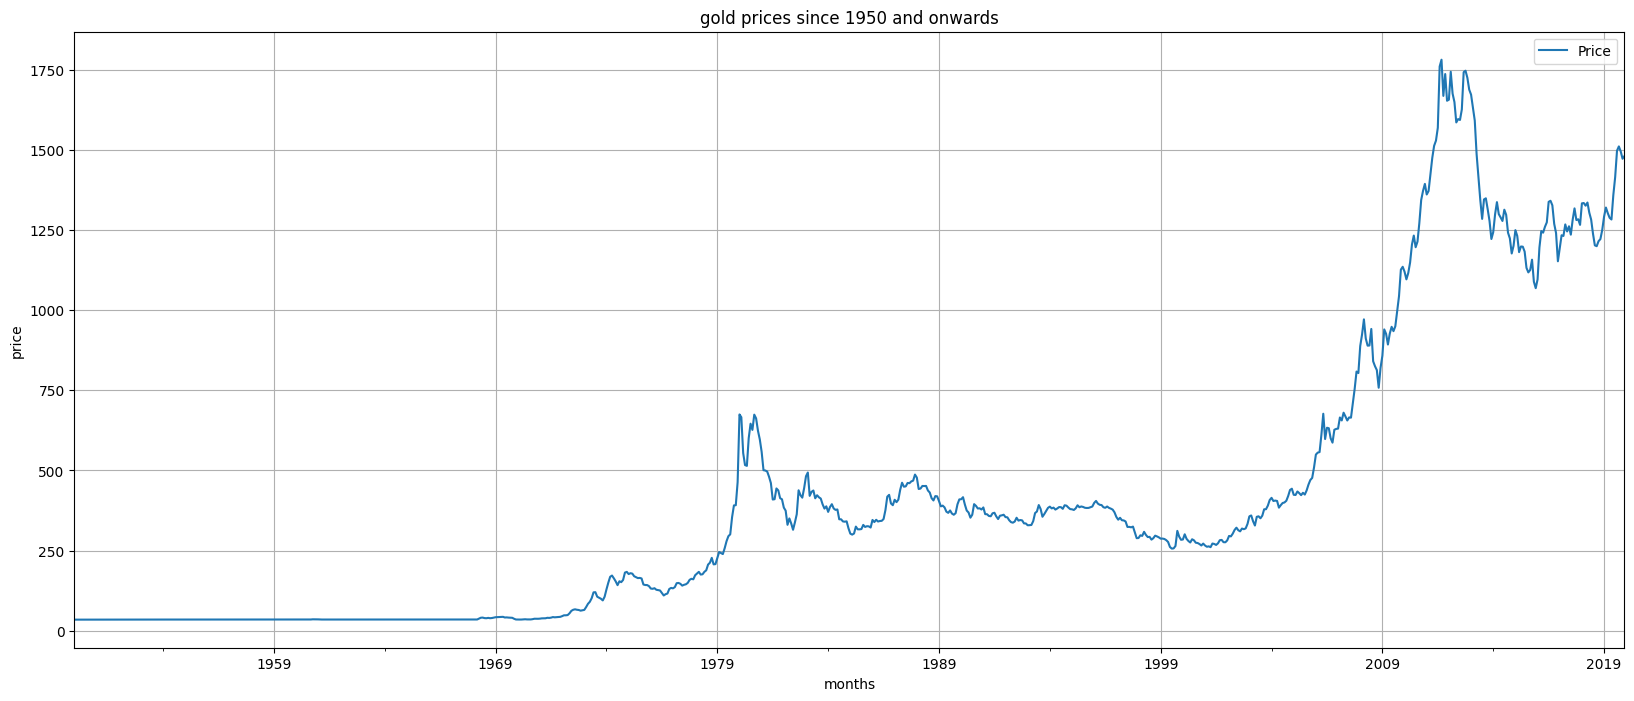

In [7]:
df.plot(figsize = (20,8))
plt.title("gold prices since 1950 and onwards")
plt.xlabel("months")
plt.ylabel("price")
plt.grid();

In [8]:
round(df.describe(),3)

,Price
count,840.000
mean,406.071
std,440.614
min,34.490
25%,35.190
50%,316.975
75%,440.280
max,1780.648


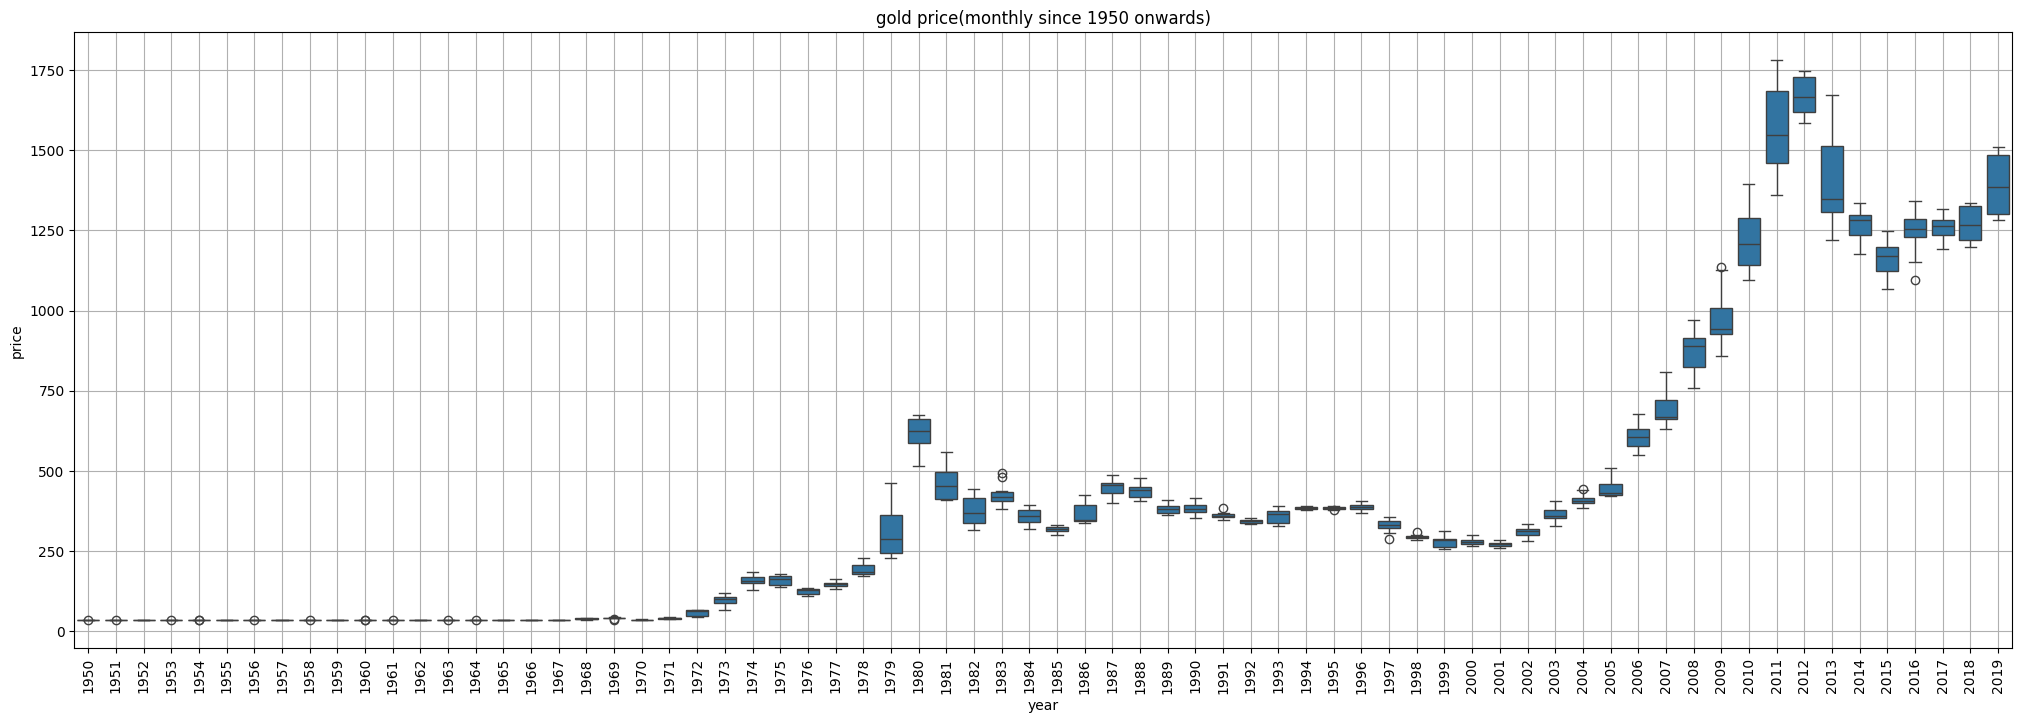

In [9]:
_, ax = plt.subplots(figsize=(25,8))
sns.boxplot(x = df.index.year, y = df.values[:, 0], ax = ax)
plt.title('gold price(monthly since 1950 onwards)')
plt.xlabel('year')
plt.ylabel('price')
plt.xticks(rotation = 90)
plt.grid();

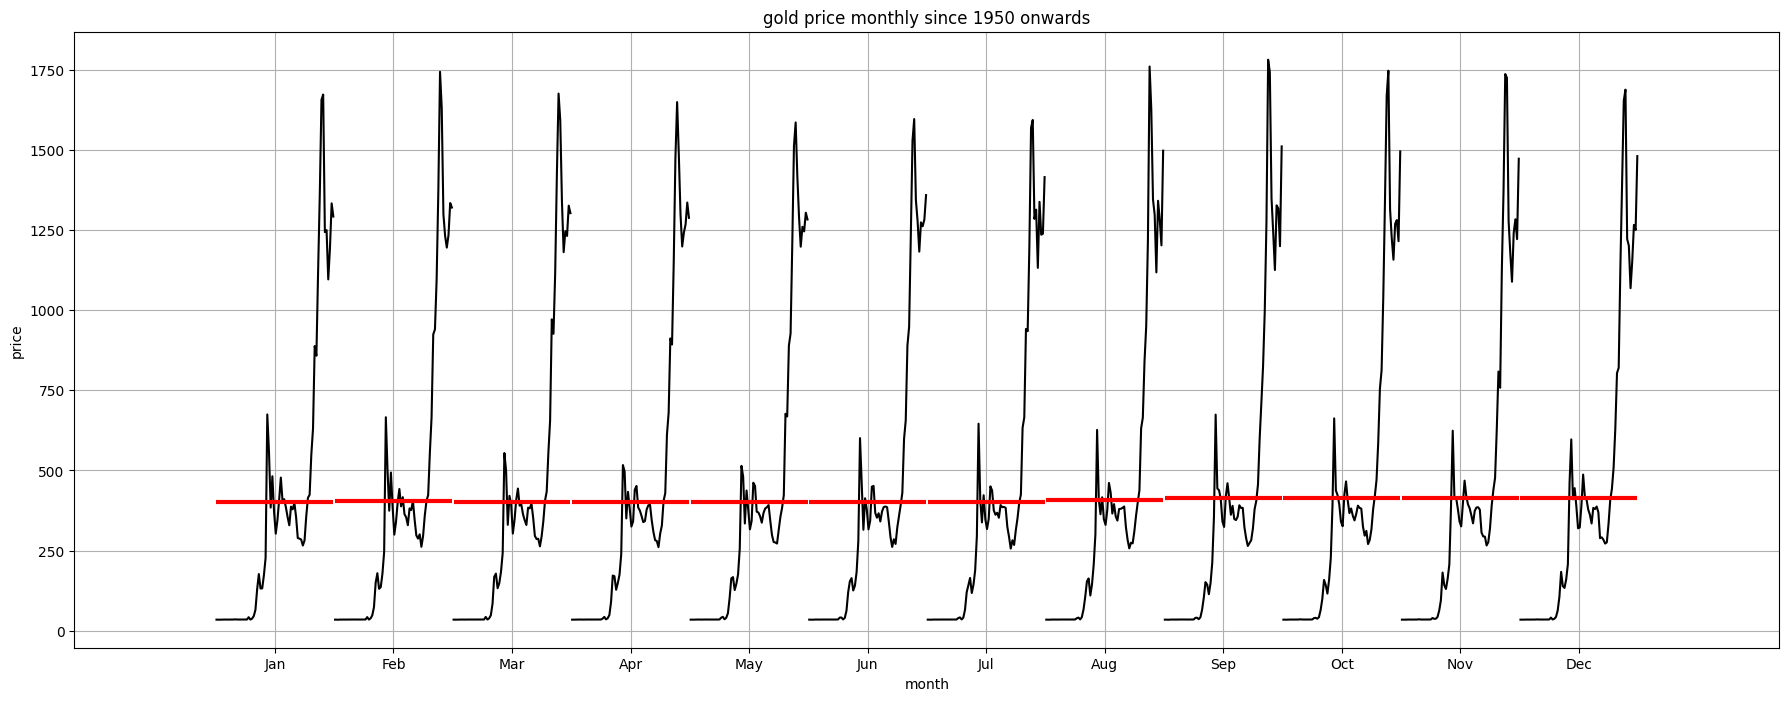

In [12]:
from statsmodels.graphics.tsaplots import month_plot
fig, ax = plt.subplots(figsize=(22,8))
month_plot(df, ylabel='gold price', ax = ax)
plt.title('gold price monthly since 1950 onwards')
plt.xlabel('month')
plt.ylabel('price')
plt.grid();

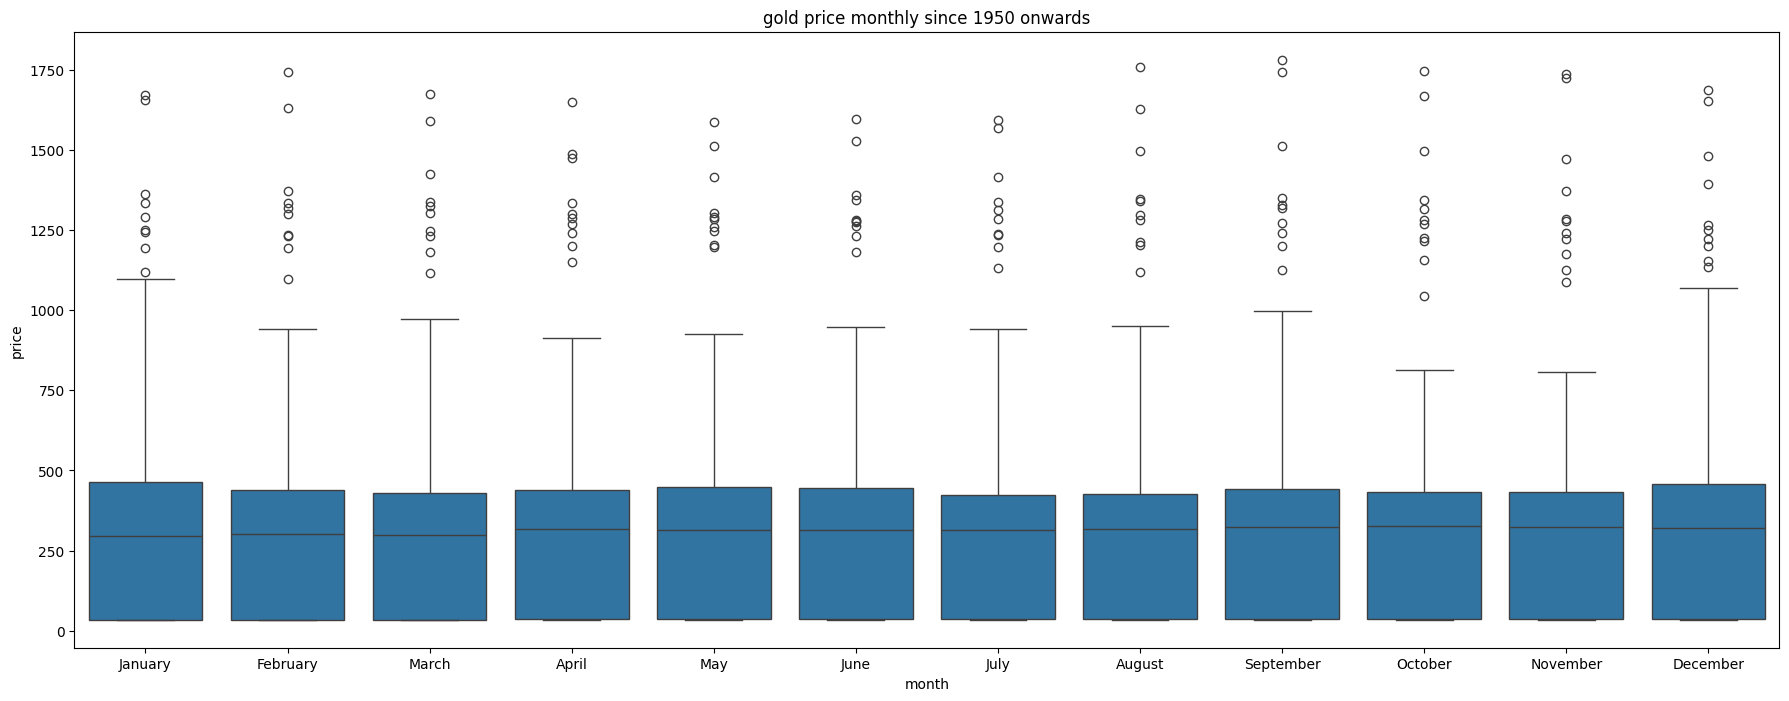

In [15]:
 _, ax = plt.subplots(figsize=(22,8))
 sns.boxplot(x = df.index.month_name(), y = df.values[:, 0], ax = ax)
 plt.title('gold price monthly since 1950 onwards')
 plt.xlabel("month")
 plt.ylabel("price")
 plt.show()

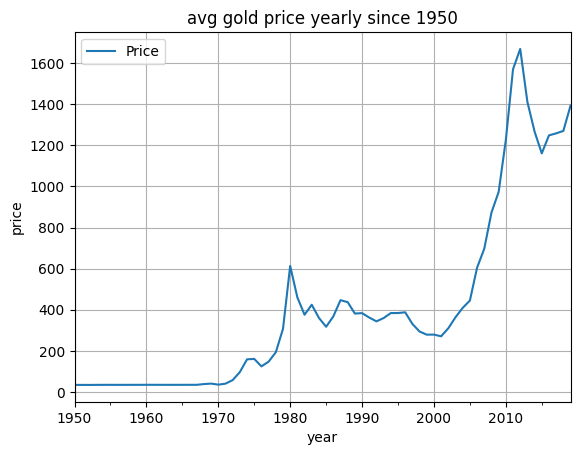

In [16]:
df_yearly_sum = df.resample('A').mean()
df_yearly_sum.plot()
plt.title('avg gold price yearly since 1950')
plt.xlabel('year')
plt.ylabel('price')
plt.grid();



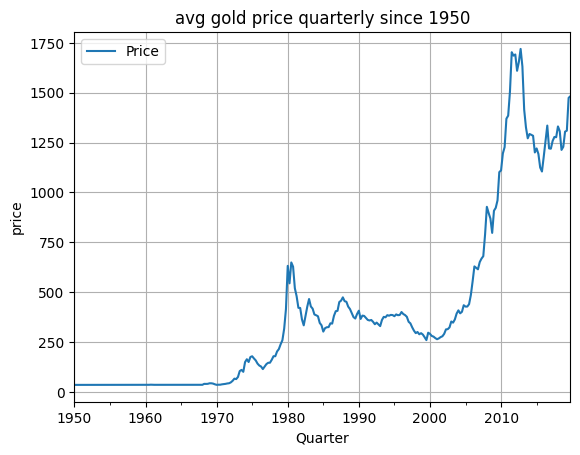

In [18]:
df_quarterly_sum = df.resample('Q').mean()
df_quarterly_sum.plot()
plt.title('avg gold price quarterly since 1950')
plt.xlabel('Quarter')
plt.ylabel('price')
plt.grid()

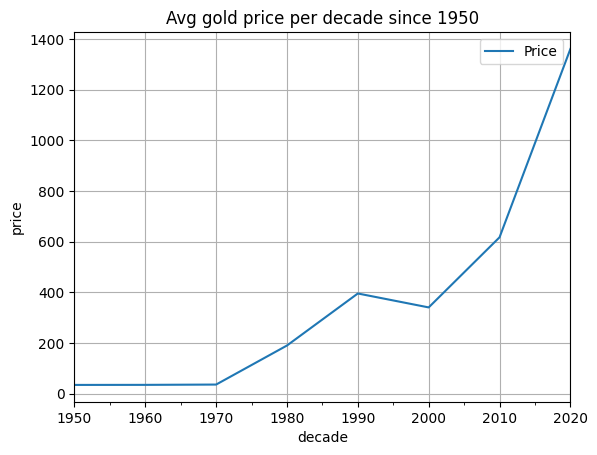

In [19]:
df_decade_sum = df.resample('10Y').mean()
df_decade_sum.plot()
plt.title('Avg gold price per decade since 1950')
plt.xlabel('decade')
plt.ylabel('price')
plt.grid()

In [20]:
#coefficient of variation
df_1 = df.groupby(df.index.year).mean().rename(columns={'Price':'Mean'})
df_1 = df_1.merge(df.groupby(df.index.year).std().rename(columns = {'Price':'Std'}), left_index = True, right_index = True)
df_1['Cov_pct'] = ((df_1['Std']/df_1['Mean'])*100).round(2)
df_1.head()

,Mean,Std,Cov_pct
month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


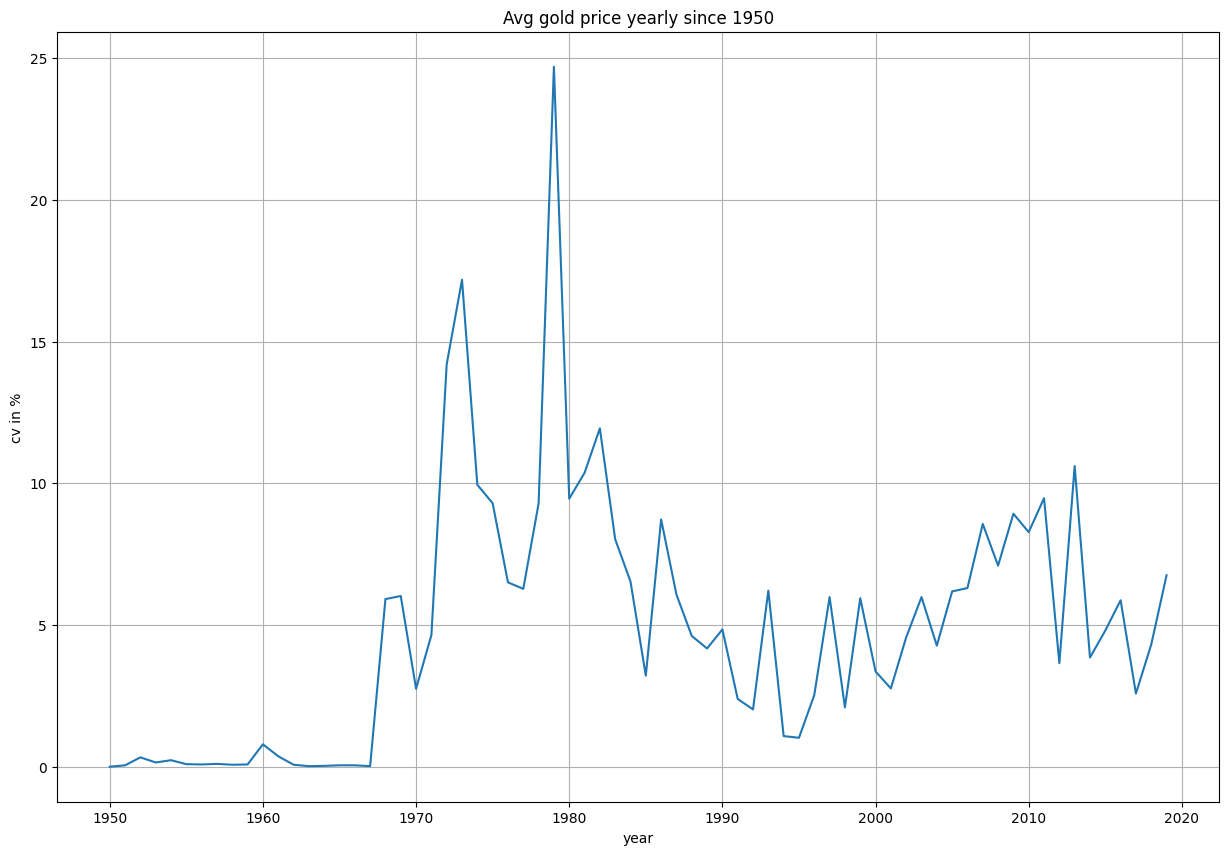

In [21]:
fig, ax = plt.subplots(figsize = (15,10))
df_1['Cov_pct'].plot();
plt.title('Avg gold price yearly since 1950')
plt.xlabel('year')
plt.ylabel('cv in %')
plt.grid()


In [23]:
train = df[df.index.year <= 2015]
test = df[df.index.year > 2015]

In [24]:
print(train.shape)
print(test.shape)

(792, 1)
(48, 1)


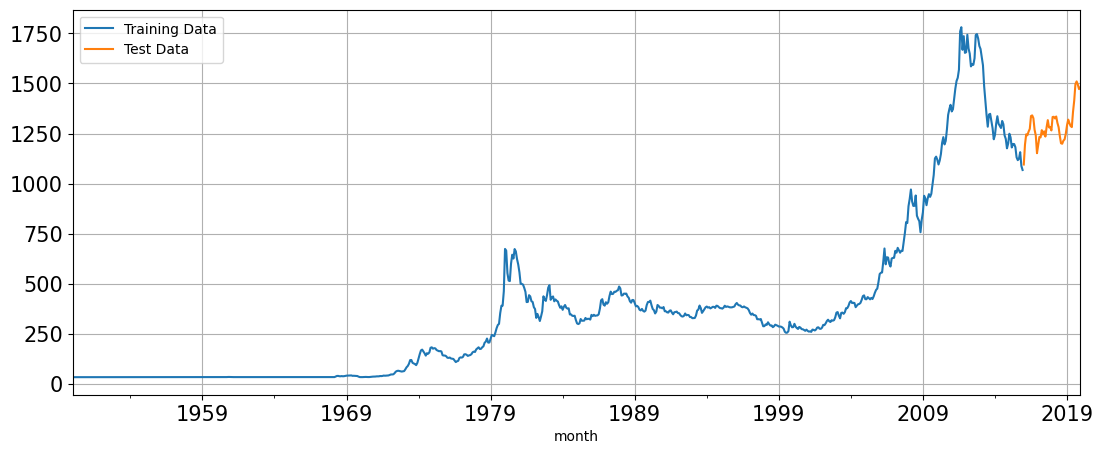

In [25]:
train['Price'].plot(figsize=(13,5), fontsize = 15)
test["Price"].plot(figsize=(13,5), fontsize = 15)
plt.grid()
plt.legend(["Training Data", 'Test Data'])
plt.show()

In [26]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train) + 1 for i in range(len(test))]
len(train_time), len(test_time)

(792, 48)

In [28]:
LR_train = train.copy()
LR_test = test.copy()

In [29]:
LR_train['time'] = train_time
LR_test['time'] = test_time

In [33]:
lr = LinearRegression()
lr.fit(LR_train[['time']], LR_train['Price'].values)

LinearRegression()

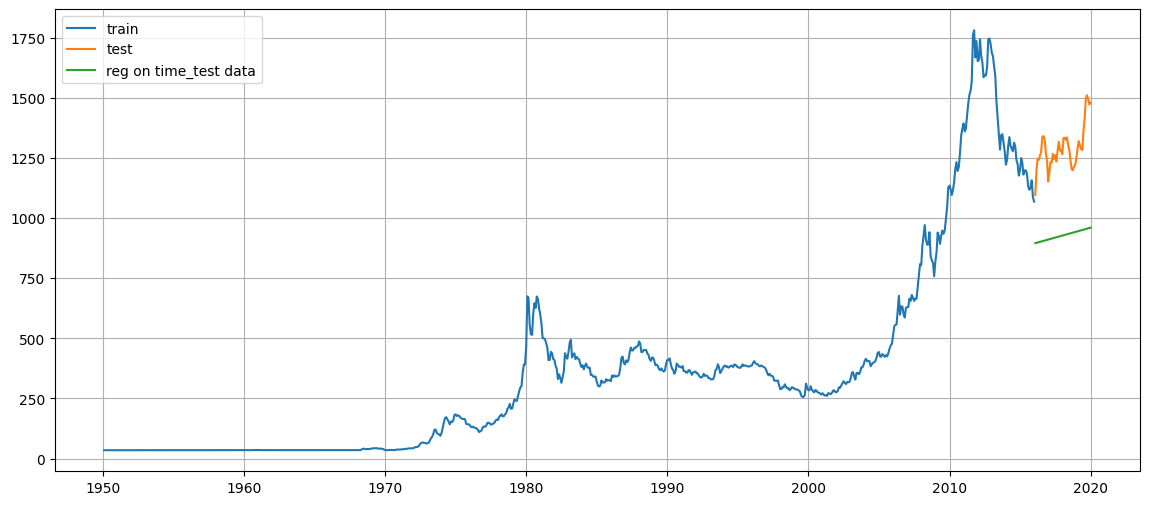

In [40]:
test_predictions_model1 = lr.predict(LR_test[["time"]])
LR_test['forecast'] = test_predictions_model1

plt.figure(figsize = (14, 6))
plt.plot(train['Price'], label = 'train')
plt.plot(test['Price'], label = 'test')
plt.plot(LR_test['forecast'], label = 'reg on time_test data')
plt.legend(loc = 'best')
plt.grid()

In [43]:
def mape(actual, pred):
   return round((np.mean(abs(actual - pred)/ actual))*100, 2)

In [44]:
mape_model1_test = mape(test['Price'].values, test_predictions_model1)
print("MAPE IS %3.3f"%(mape_model1_test), "%")

#mape is a measure of prediction of accuracy of forecasting model in statistixal model

MAPE IS 27.950 %


In [47]:
results = pd.DataFrame({'Test Mape (%)': [mape_model1_test]}, index = ["RegressionOnTime"])
results

,Test Mape (%)
RegressionOnTime,27.95


In [48]:
final_model = ExponentialSmoothing(df,
                                   trend = 'additive',
                                   seasonal = 'additive').fit(smoothing_level = 0.4,
                                                              smoothing_trend = 0.3,
                                                              smoothing_seasonal = 0.6)

In [53]:
Mape_final_model = mape(df['Price'].values, final_model.fittedvalues)
print("MAPE:", Mape_final_model)

MAPE: 17.52


In [54]:
predictions = final_model.forecast(steps = len(test))